In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Generate polynomial data

In [2]:
np.random.seed(42)
m = 200
m_train = m // 5 * 4
print("(m, m_train) = (%d, %d)" % (m, m_train))
# Input
X_data = 10 * np.random.rand(m, 1) - 5 # Note: X is randomly sampled, so we don't need to shuffle the data again

# Output
is_multiout = True
# is_multiout = False
if is_multiout:
    m_h = m // 2
    X_data_1 = X_data[:m_h]
    X_data_2 = X_data[m_h:]
    y_data_pure_1 = 0.5 * X_data_1**3 + 0.5 * X_data_1**2 + X_data_1 + 2 
    y_data_pure_2 = 0.5 * X_data_2**3 + 0.5 * X_data_2**2 + X_data_2 + 30 
#     y_data_pure_2 = 0.3 * X_data_2**3 + 1.0 * X_data_2**2 + X_data_2 + 15 
    y_data_pure = np.vstack([y_data_pure_1, y_data_pure_2])
    print("y_data_pure.shape = %s" % str(y_data_pure.shape))
else:        
    y_data_pure = 0.5 * X_data**3 + 0.5 * X_data**2 + X_data + 2 

# Label (+noise)
n_stddev = 2.0
# n_stddev = 10.0
y_data = y_data_pure + np.random.randn(m, 1) * n_stddev
print("y_data.shape = %s" % str(y_data.shape))

(m, m_train) = (200, 160)
y_data_pure.shape = (200, 1)
y_data.shape = (200, 1)


In [3]:
X_train = X_data[:m_train]
y_train = y_data[:m_train]
X_valid = X_data[m_train:]
y_valid = y_data[m_train:]

In [4]:
print(X_train.shape)

(160, 1)


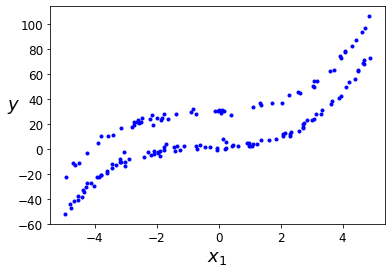

In [5]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])
plt.show()

Build the regression model

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 2s 154ms/step - loss: 1150.1981 - val_loss: 1519.4119
Epoch 2/100
5/5 [==============================] - 0s 38ms/step - loss: 775.0676 - val_loss: 555.4871
Epoch 3/100
5/5 [==============================] - 0s 41ms/step - loss: 743.3735 - val_loss: 1079.8303
Epoch 4/100
5/5 [==============================] - 0s 34ms/step - loss: 531.0511 - val_loss: 827.4048
Epoch 5/100
5/5 [==============================] - 0s 48ms/step - loss: 502.7017 - val_loss: 117.7328
Epoch 6/100
5/5 [==============================] - 0s 49ms/step - loss: 454.8417 - val_loss: 663.8578
Epoch 7/100
5/5 [==============================] - 0s 58ms/step - loss: 506.9738 - val_loss: 305.9917
Epoch 8/100
5/5 [==============================] - 0s 55ms/step - loss: 650.4979 - val_loss: 1061.0735
Epoch 9/100
5/5 [==============================] - 0s 64ms/step - loss: 513.2836 - val_loss: 732.4552
Epoch 10/100
5/5 [==============================] - 0s 59ms/step - loss: 645.

5/5 [==============================] - 0s 51ms/step - loss: 196.5634 - val_loss: 340.5498
Epoch 81/100
5/5 [==============================] - 0s 46ms/step - loss: 184.9113 - val_loss: 275.9986
Epoch 82/100
5/5 [==============================] - 0s 69ms/step - loss: 207.0200 - val_loss: 252.2906
Epoch 83/100
5/5 [==============================] - 0s 53ms/step - loss: 208.9666 - val_loss: 312.7246
Epoch 84/100
5/5 [==============================] - 0s 67ms/step - loss: 204.4477 - val_loss: 411.6788
Epoch 85/100
5/5 [==============================] - 0s 56ms/step - loss: 202.3067 - val_loss: 380.9145
Epoch 86/100
5/5 [==============================] - 0s 50ms/step - loss: 189.0857 - val_loss: 266.3231
Epoch 87/100
5/5 [==============================] - 0s 55ms/step - loss: 194.3931 - val_loss: 316.8395
Epoch 88/100
5/5 [==============================] - 0s 58ms/step - loss: 222.2655 - val_loss: 383.9752
Epoch 89/100
5/5 [==============================] - 0s 40ms/step - loss: 219.9595 - va

Plot the result

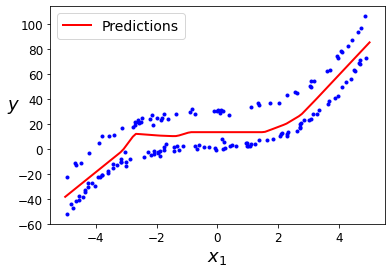

In [8]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_new = model.predict(X_new)
#
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

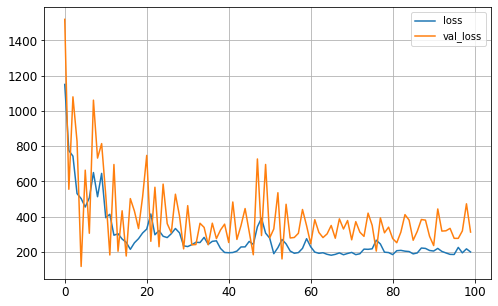

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

# Simulated CNN Feature Map (1-D, grids)

In [10]:
class num2grid(keras.layers.Layer):
    def __init__(self, units, x_min=-10, x_max=10, sigma=1.0, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.x_min = x_min
        self.x_max = x_max
        self.sigma = sigma
        self.sigma2 = self.sigma**2
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        #
        self.x_grid = np.linspace(self.x_min, self.x_max, self.units, endpoint=True)
        #
        super().build(batch_input_shape) # must be at the end
        
    def call(self, X):
        gauss_grid = tf.exp( -(self.x_grid - X)**2 / (2.0*self.sigma2) )
        return self.activation(gauss_grid)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
                "units": self.units,
                "x_min": self.x_min,
                "x_max": self.x_max,
                "sigma": self.sigma,
                "activation": keras.activations.serialize(self.activation)}

In [11]:
model = keras.models.Sequential([
    num2grid(5,x_min=-10, x_max=10, sigma=3.0, input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
#     keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=optimizer)

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 1s 122ms/step - loss: 1176.8757 - val_loss: 1642.4459
Epoch 2/100
5/5 [==============================] - 0s 43ms/step - loss: 1078.4590 - val_loss: 1279.7756
Epoch 3/100
5/5 [==============================] - 0s 35ms/step - loss: 853.6434 - val_loss: 542.3060
Epoch 4/100
5/5 [==============================] - 0s 48ms/step - loss: 651.3544 - val_loss: 230.6004
Epoch 5/100
5/5 [==============================] - 0s 51ms/step - loss: 428.4355 - val_loss: 418.4638
Epoch 6/100
5/5 [==============================] - 0s 62ms/step - loss: 393.9982 - val_loss: 432.9721
Epoch 7/100
5/5 [==============================] - 0s 56ms/step - loss: 380.1400 - val_loss: 380.9066
Epoch 8/100
5/5 [==============================] - 0s 57ms/step - loss: 358.5923 - val_loss: 480.0744
Epoch 9/100
5/5 [==============================] - 0s 38ms/step - loss: 338.7081 - val_loss: 427.1022
Epoch 10/100
5/5 [==============================] - 0s 59ms/step - loss: 312.

5/5 [==============================] - 0s 39ms/step - loss: 181.7064 - val_loss: 313.6311
Epoch 81/100
5/5 [==============================] - 0s 53ms/step - loss: 181.4322 - val_loss: 276.3868
Epoch 82/100
5/5 [==============================] - 0s 39ms/step - loss: 184.7879 - val_loss: 310.2456
Epoch 83/100
5/5 [==============================] - 0s 39ms/step - loss: 179.3032 - val_loss: 308.1998
Epoch 84/100
5/5 [==============================] - 0s 51ms/step - loss: 188.1300 - val_loss: 284.2628
Epoch 85/100
5/5 [==============================] - 0s 63ms/step - loss: 185.9594 - val_loss: 338.0696
Epoch 86/100
5/5 [==============================] - 0s 46ms/step - loss: 185.3436 - val_loss: 269.9923
Epoch 87/100
5/5 [==============================] - 0s 45ms/step - loss: 188.3352 - val_loss: 333.0992
Epoch 88/100
5/5 [==============================] - 0s 45ms/step - loss: 180.2603 - val_loss: 262.0948
Epoch 89/100
5/5 [==============================] - 0s 62ms/step - loss: 180.7613 - va

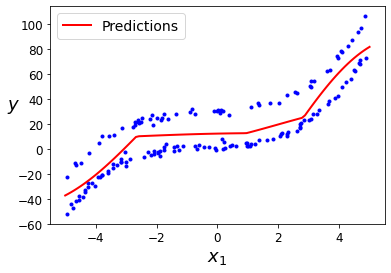

In [13]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
y_new = model.predict(X_new)
#
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

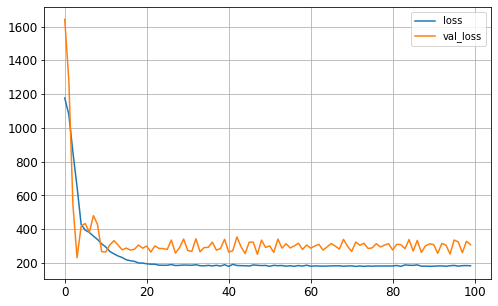

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()